In [79]:
pip show statsmodels

Name: statsmodelsNote: you may need to restart the kernel to use updated packages.

Version: 0.14.0
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: 
Author-email: 
License: BSD License
Location: c:\users\aniru\anaconda3\lib\site-packages
Requires: numpy, packaging, pandas, patsy, scipy, scipy
Required-by: 


In [37]:
X_nt.columns

Index(['AGE', 'DM', 'HTN', 'CKD', 'INCIDENTAL', 'PAIN', 'HEMATURIA', 'MASS',
       'LOW', 'FEVER', 'T', 'N', 'M', 'IVC INV', 'MAX DIA', 'GRADE', 'MONTHS',
       'SEX_M', 'SITE_LEFT', 'SITE_RIGHT', 'HISTOPATHOLOGY_CC', 'APPROACH_1',
       'APPROACH_2', 'APPROACH_3'],
      dtype='object')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
# from sklearn.compose import make_column_transformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, Callback
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow.keras.metrics as metrics
from scikeras.wrappers import KerasClassifier
from sklearn.datasets import make_classification
import time
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (classification_report, confusion_matrix, make_scorer, f1_score, recall_score, balanced_accuracy_score,
matthews_corrcoef, jaccard_score, average_precision_score, roc_auc_score)
from tabulate import tabulate
from sklearn.base import ClassifierMixin, BaseEstimator
import winsound
import random
import os
from imblearn.over_sampling import RandomOverSampler
from pandas.plotting import scatter_matrix
from scipy.stats import pointbiserialr, spearmanr, chi2_contingency
import statsmodels.api as sm
from sklearn.feature_selection import mutual_info_classif

In [2]:
X_nt = pd.read_csv("C:\Aniruddh\Python\Jupyter\RCC\CSV FILES\Cleaned data\RCC_non_test_set.csv", index_col = 0)
X_t = pd.read_csv("C:\Aniruddh\Python\Jupyter\RCC\CSV FILES\Cleaned data\RCC_test_set.csv", index_col = 0)
X_nt = X_nt.drop(index = 83)
drop_onehot = ['SEX_F', 'SITE_BL', 'HISTOPATHOLOGY_PAP']# 'APPROACH_3'
X_nt = X_nt.drop(columns = drop_onehot)
X_t = X_t.drop(columns = drop_onehot)
X = pd.concat([X_nt, X_t])
y = X.pop("RECURRENCE")
y_nt = X_nt.pop("RECURRENCE")
y_t = X_t.pop("RECURRENCE")

In [3]:
# col_list = ['M', 'GRADE', 'T', 'IVC INV', 'MAX DIA', 'AGE', 'MONTHS', 'HEMATURIA', 'APPROACH_1', 'APPROACH_2', 'N']
# len(col_list)

In [4]:
# X_nontest_1 = X_nt[col_list]
# X_test_1 = X_t[col_list]

In [5]:
# X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_nontest_1, y_nt, test_size = 0.25, random_state = 42, stratify = y_nt)
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_nt, y_nt, test_size = 0.25, random_state = 42, stratify = y_nt)

In [6]:
oversampler = RandomOverSampler(random_state=42)
X_train_bal_1, y_train_bal_1 = oversampler.fit_resample(X_train_1, y_train_1)

In [7]:
X_test_1 = X_t.copy()

In [8]:
def preprocessor(X_train, X_test, X_val = None):
    imputer = SimpleImputer(strategy = 'median')
    scaler = StandardScaler()
    X_train_pp = scaler.fit_transform(imputer.fit_transform(X_train))
    X_test_pp = scaler.transform(imputer.transform(X_test))
    if X_val is not None:
        X_val_pp = scaler.transform(imputer.transform(X_val))
        return X_train_pp, X_test_pp, X_val_pp
    else:
        return X_train_pp, X_test_pp

In [9]:
X_train_pp, X_test_pp, X_val_pp = preprocessor(X_train_bal_1, X_test_1, X_val_1) # X_train_bal_1

In [10]:
X['RECURRENCE'] = y

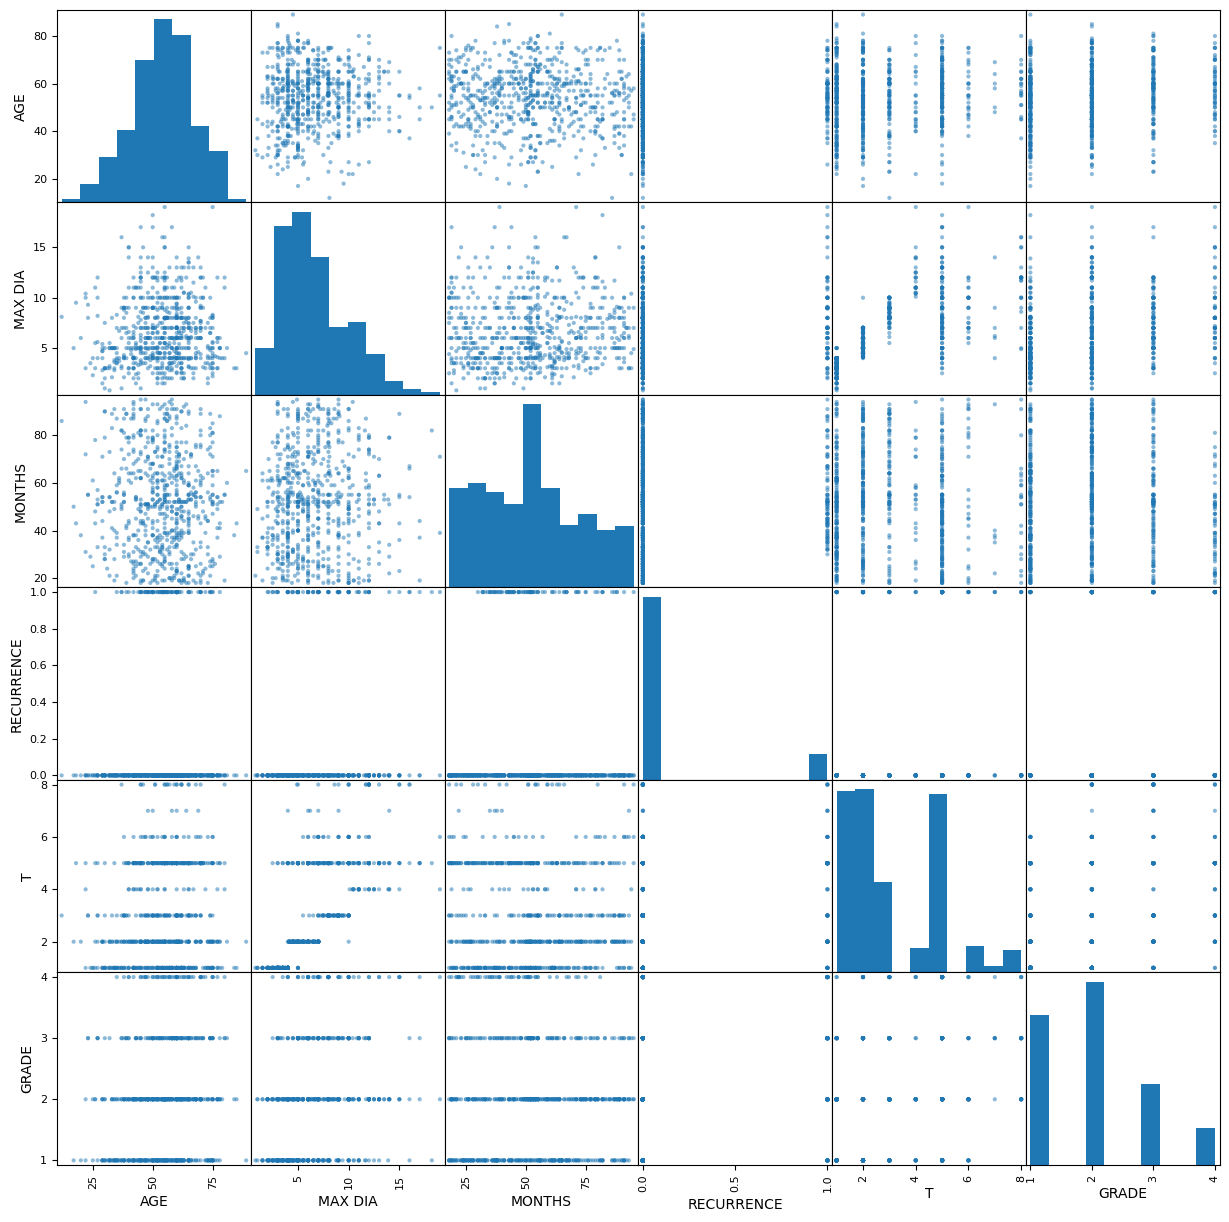

In [11]:
cont_cols = ['AGE', 'MAX DIA', 'MONTHS', 'RECURRENCE', 'T', 'GRADE']
p = scatter_matrix(X[cont_cols], figsize = (15, 15))

In [12]:
X['AGE'].values.reshape(-1, 1).shape

(693, 1)

In [13]:
df = X[['MONTHS', 'MAX DIA']].copy()
# df['NEWAGE'] = df['AGE'] ** 3
temp_X = df.iloc[:, 0:-1].values
temp_y = df.iloc[:, -1].values

In [14]:
pr = PolynomialFeatures(degree = 4)
X_poly = pr.fit_transform(temp_X)
lr_2 = LinearRegression()
lr_2.fit(X_poly, temp_y)

LinearRegression()

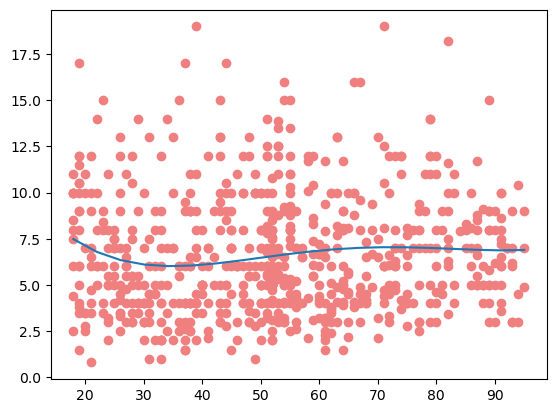

In [15]:
plt.scatter(temp_X, temp_y, color = 'lightcoral')
# plt.plot(temp_X, lr_2.predict(X_poly), color = 'firebrick')
xl = np.linspace(temp_X.min(), temp_X.max(), 20)
plt.plot(xl, lr_2.predict(pr.fit_transform(xl.reshape(-1, 1))))
# plt.title('Real data (Linear Regression)')
# plt.xlabel('Position Level')
# plt.ylabel('Salary')
# plt.legend(['X/y_pred_lr', 'X/y'], title = 'Salary/Level', loc='best', facecolor='white')
# plt.box(False)
plt.show()

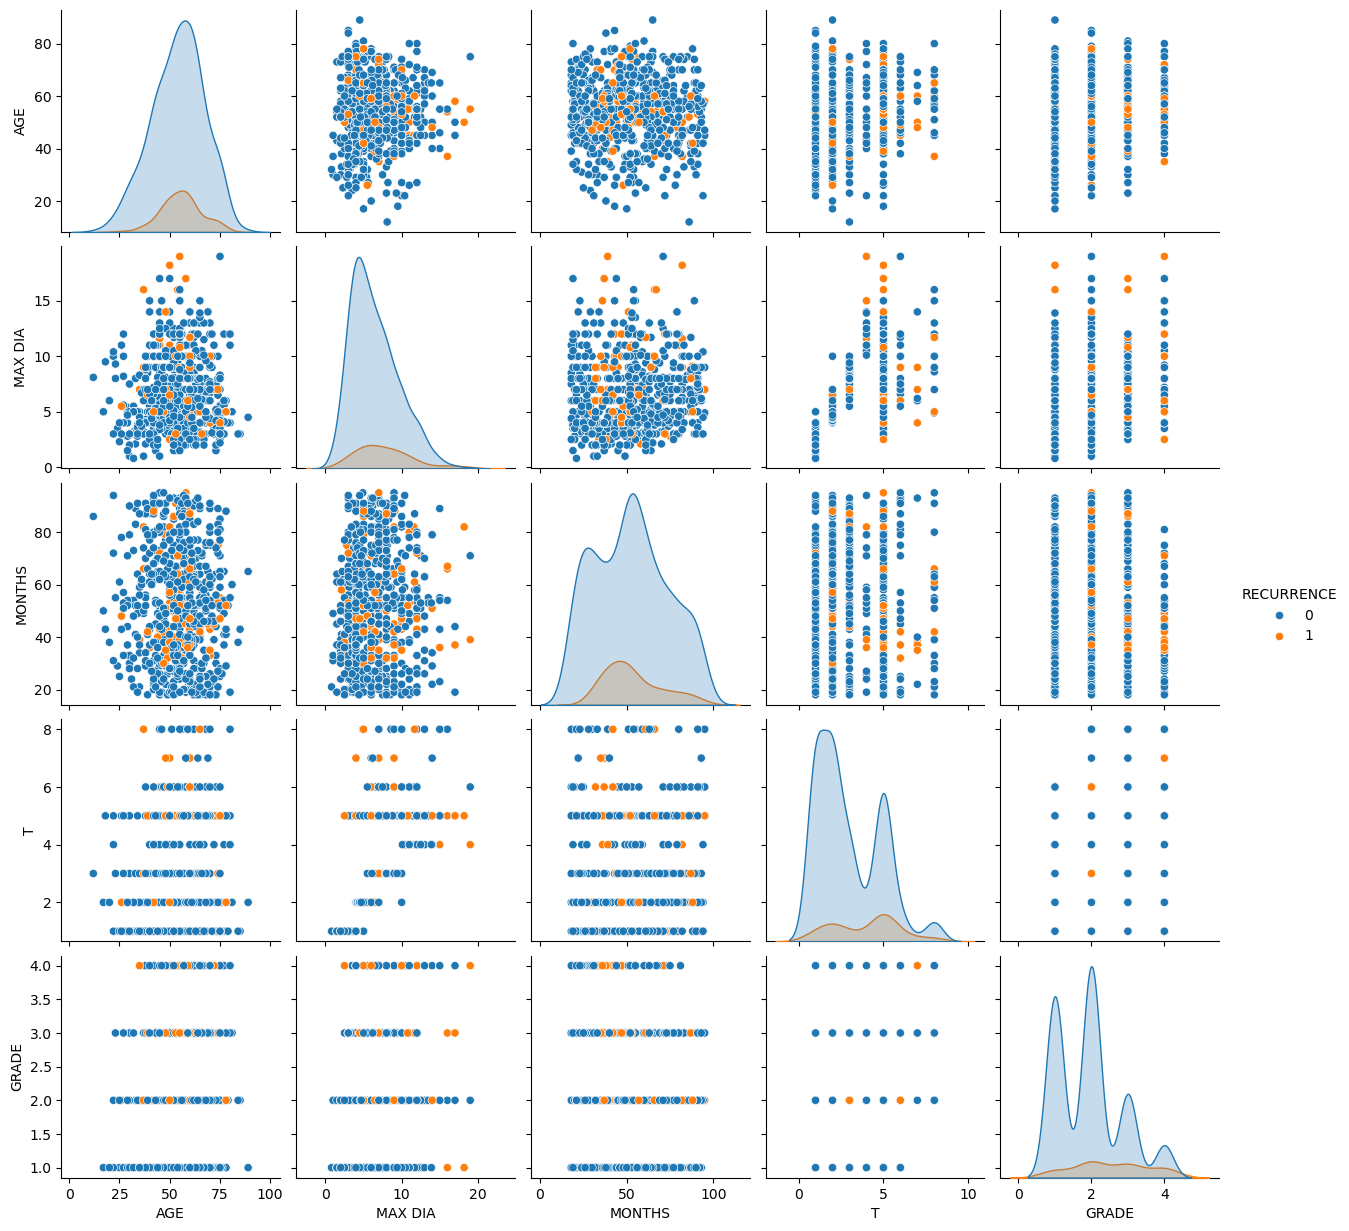

In [16]:
q = sns.pairplot(X[cont_cols], hue = 'RECURRENCE')

In [17]:
# poor correlation among the continuous variables

In [18]:
# cont and target:
# Point-Biserial Correlation for AGE vs. RECURRENCE: 0.04414112836574702, p-value: 0.24585406743621915
# Point-Biserial Correlation for MAX DIA vs. RECURRENCE: 0.13001216338220478, p-value: 0.0006014712168539248
# Point-Biserial Correlation for MONTHS vs. RECURRENCE: 0.02150581252403306, p-value: 0.5719502767651778

In [19]:
imp = SimpleImputer(strategy = 'median')
c = X.columns
dummy_X = pd.DataFrame(imp.fit_transform(X), columns = c)
dummy_X
# dummy_X.isna().sum().sum()

,AGE,DM,HTN,CKD,INCIDENTAL,PAIN,HEMATURIA,MASS,LOW,FEVER,...,GRADE,MONTHS,SEX_M,SITE_LEFT,SITE_RIGHT,HISTOPATHOLOGY_CC,APPROACH_1,APPROACH_2,APPROACH_3,RECURRENCE
0,52.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,71.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,61.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,52.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,58.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,19.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,75.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,52.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,17.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,50.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,20.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,38.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
689,43.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,21.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
690,32.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,73.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
691,29.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,71.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [20]:
dummy_X.DM.sum(), len(dummy_X.DM)

(89.0, 693)

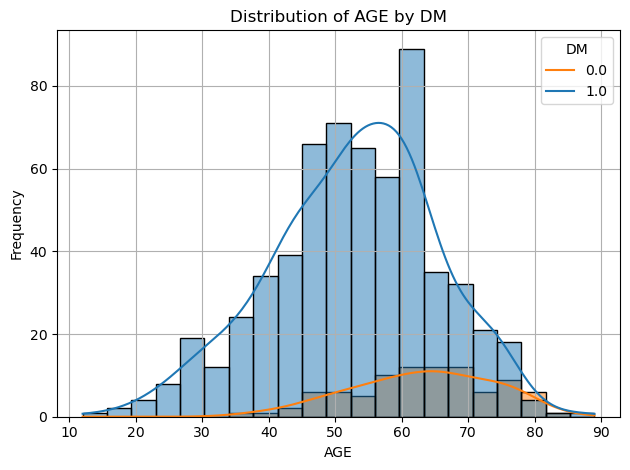

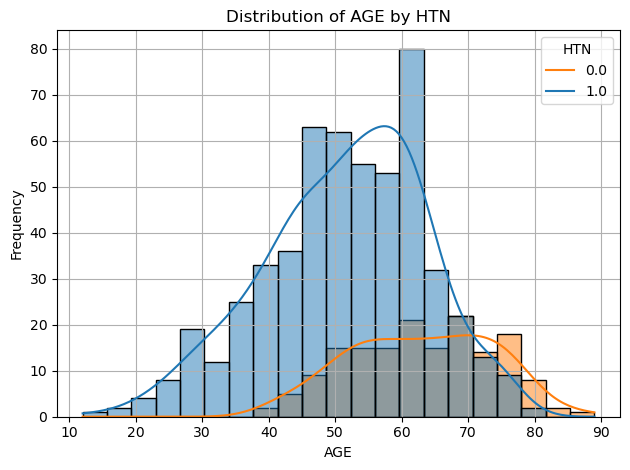

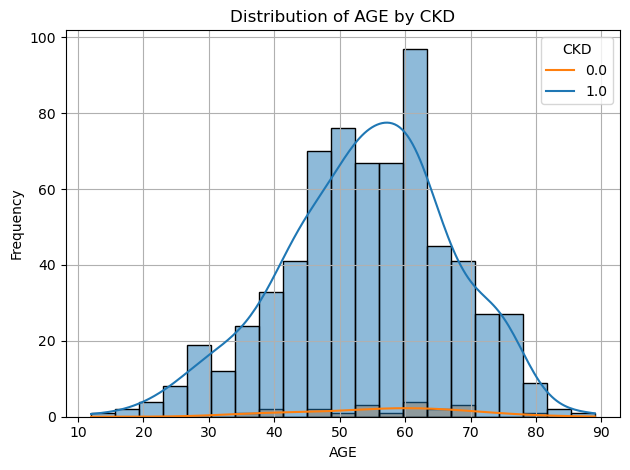

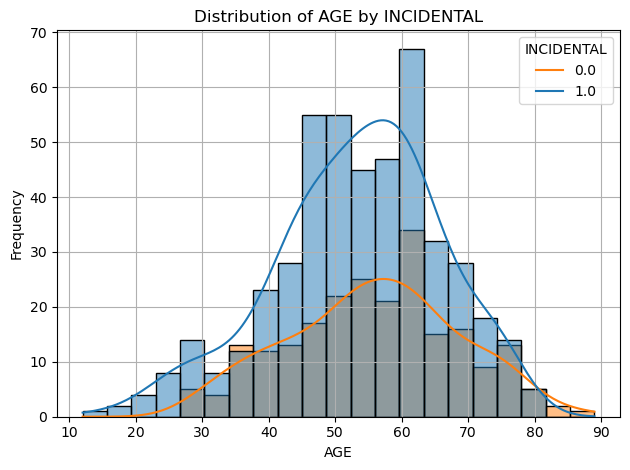

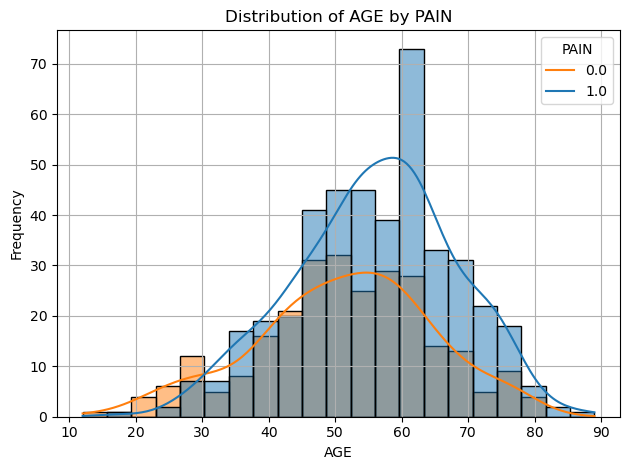

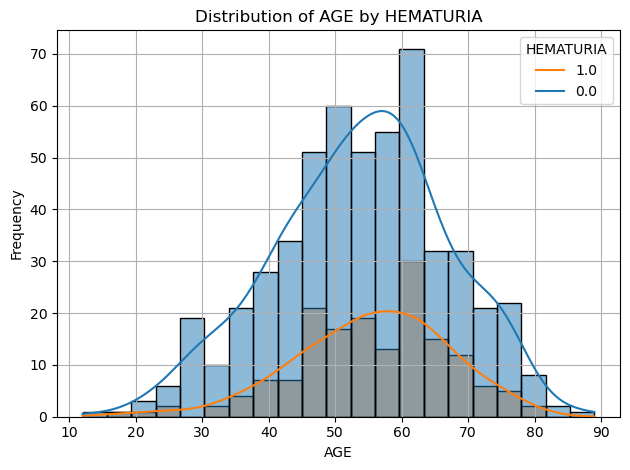

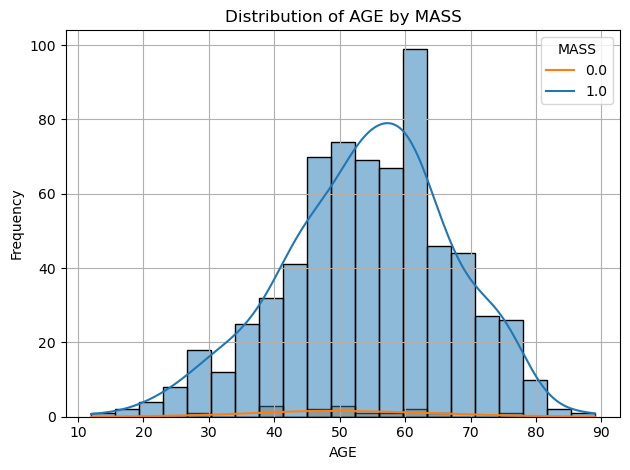

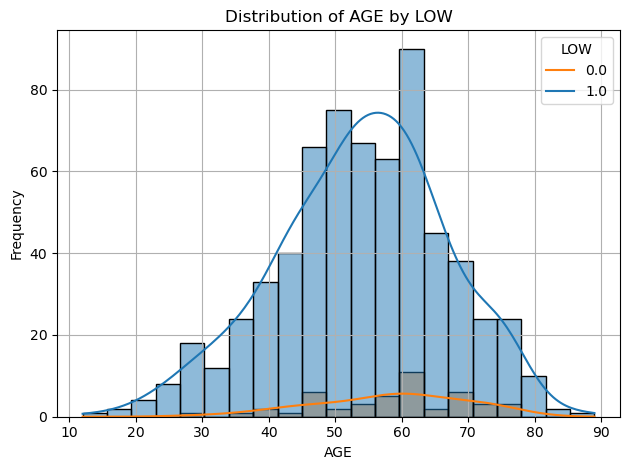

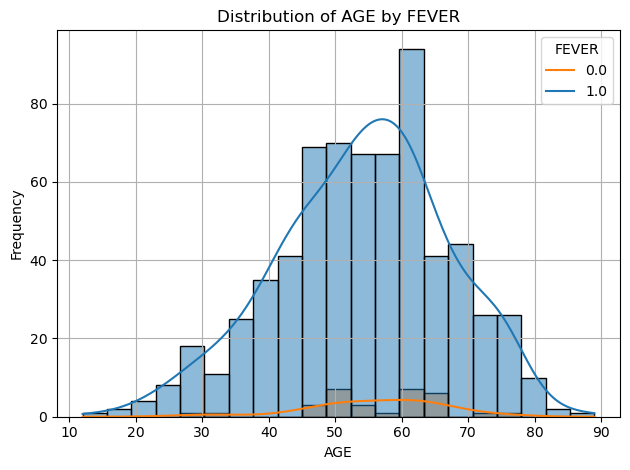

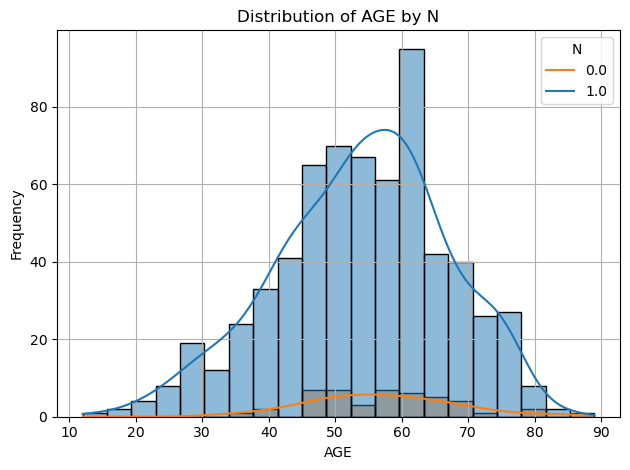

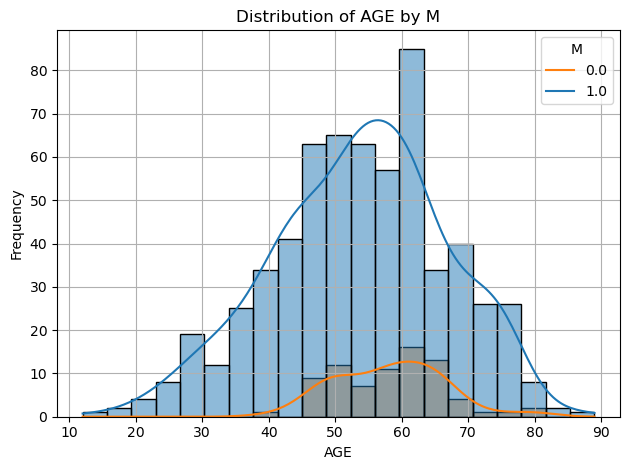

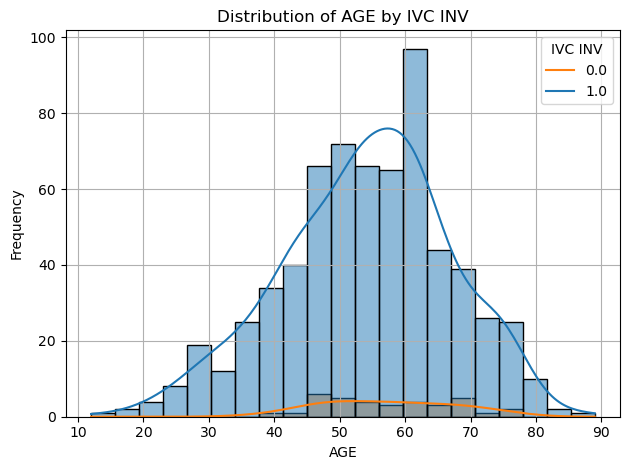

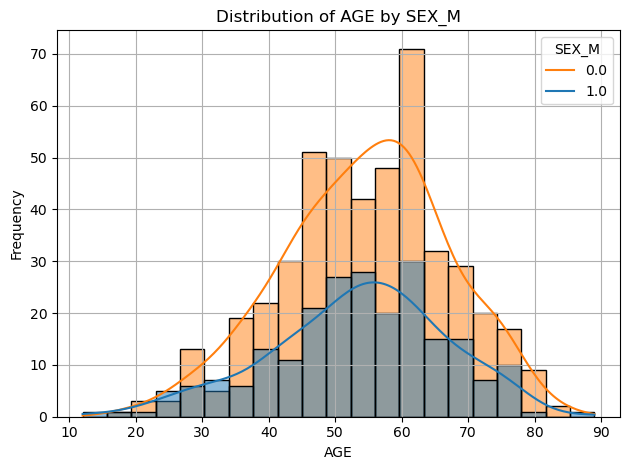

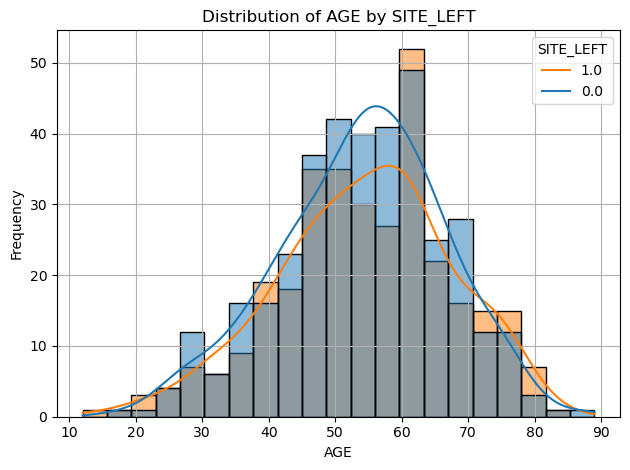

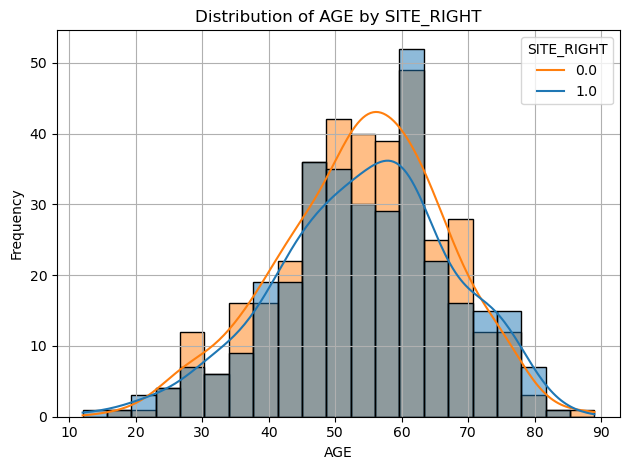

KeyError: 'SITE_BL'

In [21]:
# significance level = 0.05
for feature in ['AGE', 'MAX DIA', 'MONTHS']:
    for binary in ['DM', 'HTN', 'CKD', 'INCIDENTAL', 'PAIN', 'HEMATURIA', 'MASS', 'LOW', 'FEVER', 'N', 'M', 'IVC INV', 'SEX_M',
                'SITE_LEFT', 'SITE_RIGHT', 'SITE_BL', 'HISTOPATHOLOGY_CC', 'APPROACH_1', 'APPROACH_2', 'APPROACH_3', 'RECURRENCE']:
        # plt.figure(figsize=(8, 6))
        binary_values = dummy_X[binary].unique()
        sns.histplot(data=dummy_X, x=feature, hue=binary, kde=True, label=binary)
        plt.title(f'Distribution of {feature} by {binary}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.legend(title=binary, labels=binary_values.astype(str))
        plt.grid(True)
        plt.tight_layout()
        plt.show()

In [23]:
pbr_list = []
# significance level = 0.05
for feature in ['AGE', 'MAX DIA', 'MONTHS']:
    for binary in ['DM', 'HTN', 'CKD', 'INCIDENTAL', 'PAIN', 'HEMATURIA', 'MASS', 'LOW', 'FEVER', 'N', 'M', 'IVC INV', 'SEX_M',
                'SITE_LEFT', 'SITE_RIGHT', 'HISTOPATHOLOGY_CC', 'APPROACH_1', 'APPROACH_2', 'APPROACH_3', 'RECURRENCE']:
        pb_corr, p_value = pointbiserialr(dummy_X[feature], dummy_X[binary])
        # print(f"Point-Biserial Correlation for {feature} vs. {binary}: {pb_corr}, p-value: {p_value}")
        if p_value <= 0.05:
            pbr_list.append((feature, binary, pb_corr, p_value))
    # print()
pbr_df = pd.DataFrame(pbr_list, columns = ['CONT', 'BIN', 'CORR', 'PVAL'])
pbr_df

,CONT,BIN,CORR,PVAL
0,AGE,DM,0.267515,8.038604e-13
1,AGE,HTN,0.379344,3.856409e-25
2,AGE,INCIDENTAL,0.091969,1.544237e-02
3,AGE,PAIN,-0.178273,2.330396e-06
4,AGE,LOW,0.086375,2.296841e-02
5,AGE,M,0.112216,3.095601e-03
6,AGE,APPROACH_1,0.087441,2.132793e-02
7,MAX DIA,INCIDENTAL,-0.298068,1.098224e-15
8,MAX DIA,HEMATURIA,0.319605,6.374677e-18
9,MAX DIA,MASS,0.238154,2.158106e-10


In [24]:
def make_mi_scores(data, target, discrete_features):
    mi_scores = mutual_info_classif(data, target, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=data.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [25]:
int_cols = list(set(dummy_X.columns) - set(['MAX DIA']))
dummy_X[int_cols] = dummy_X[int_cols].astype('int64')
dummy_X.dtypes

AGE                    int64
DM                     int64
HTN                    int64
CKD                    int64
INCIDENTAL             int64
PAIN                   int64
HEMATURIA              int64
MASS                   int64
LOW                    int64
FEVER                  int64
T                      int64
N                      int64
M                      int64
IVC INV                int64
MAX DIA              float64
GRADE                  int64
MONTHS                 int64
SEX_M                  int64
SITE_LEFT              int64
SITE_RIGHT             int64
HISTOPATHOLOGY_CC      int64
APPROACH_1             int64
APPROACH_2             int64
APPROACH_3             int64
RECURRENCE             int64
dtype: object

In [26]:
dd_X = dummy_X.copy()
dd_y = dd_X.pop('RECURRENCE')

In [27]:
discrete_vars = dd_X.dtypes == 'int64'
discrete_vars

AGE                   True
DM                    True
HTN                   True
CKD                   True
INCIDENTAL            True
PAIN                  True
HEMATURIA             True
MASS                  True
LOW                   True
FEVER                 True
T                     True
N                     True
M                     True
IVC INV               True
MAX DIA              False
GRADE                 True
MONTHS                True
SEX_M                 True
SITE_LEFT             True
SITE_RIGHT            True
HISTOPATHOLOGY_CC     True
APPROACH_1            True
APPROACH_2            True
APPROACH_3            True
dtype: bool

In [28]:
mi_scores = make_mi_scores(dd_X, dd_y, discrete_vars)
mi_scores

MONTHS               0.094036
AGE                  0.053825
MAX DIA              0.023567
GRADE                0.022850
T                    0.019472
M                    0.007733
IVC INV              0.004888
APPROACH_3           0.004710
HEMATURIA            0.004320
APPROACH_1           0.003882
INCIDENTAL           0.003281
HTN                  0.003109
SITE_LEFT            0.001650
PAIN                 0.001555
SITE_RIGHT           0.001404
SEX_M                0.001286
HISTOPATHOLOGY_CC    0.000777
APPROACH_2           0.000448
N                    0.000218
DM                   0.000120
LOW                  0.000095
CKD                  0.000077
MASS                 0.000006
FEVER                0.000003
Name: MI Scores, dtype: float64

In [ ]:
# correlation with T and binary

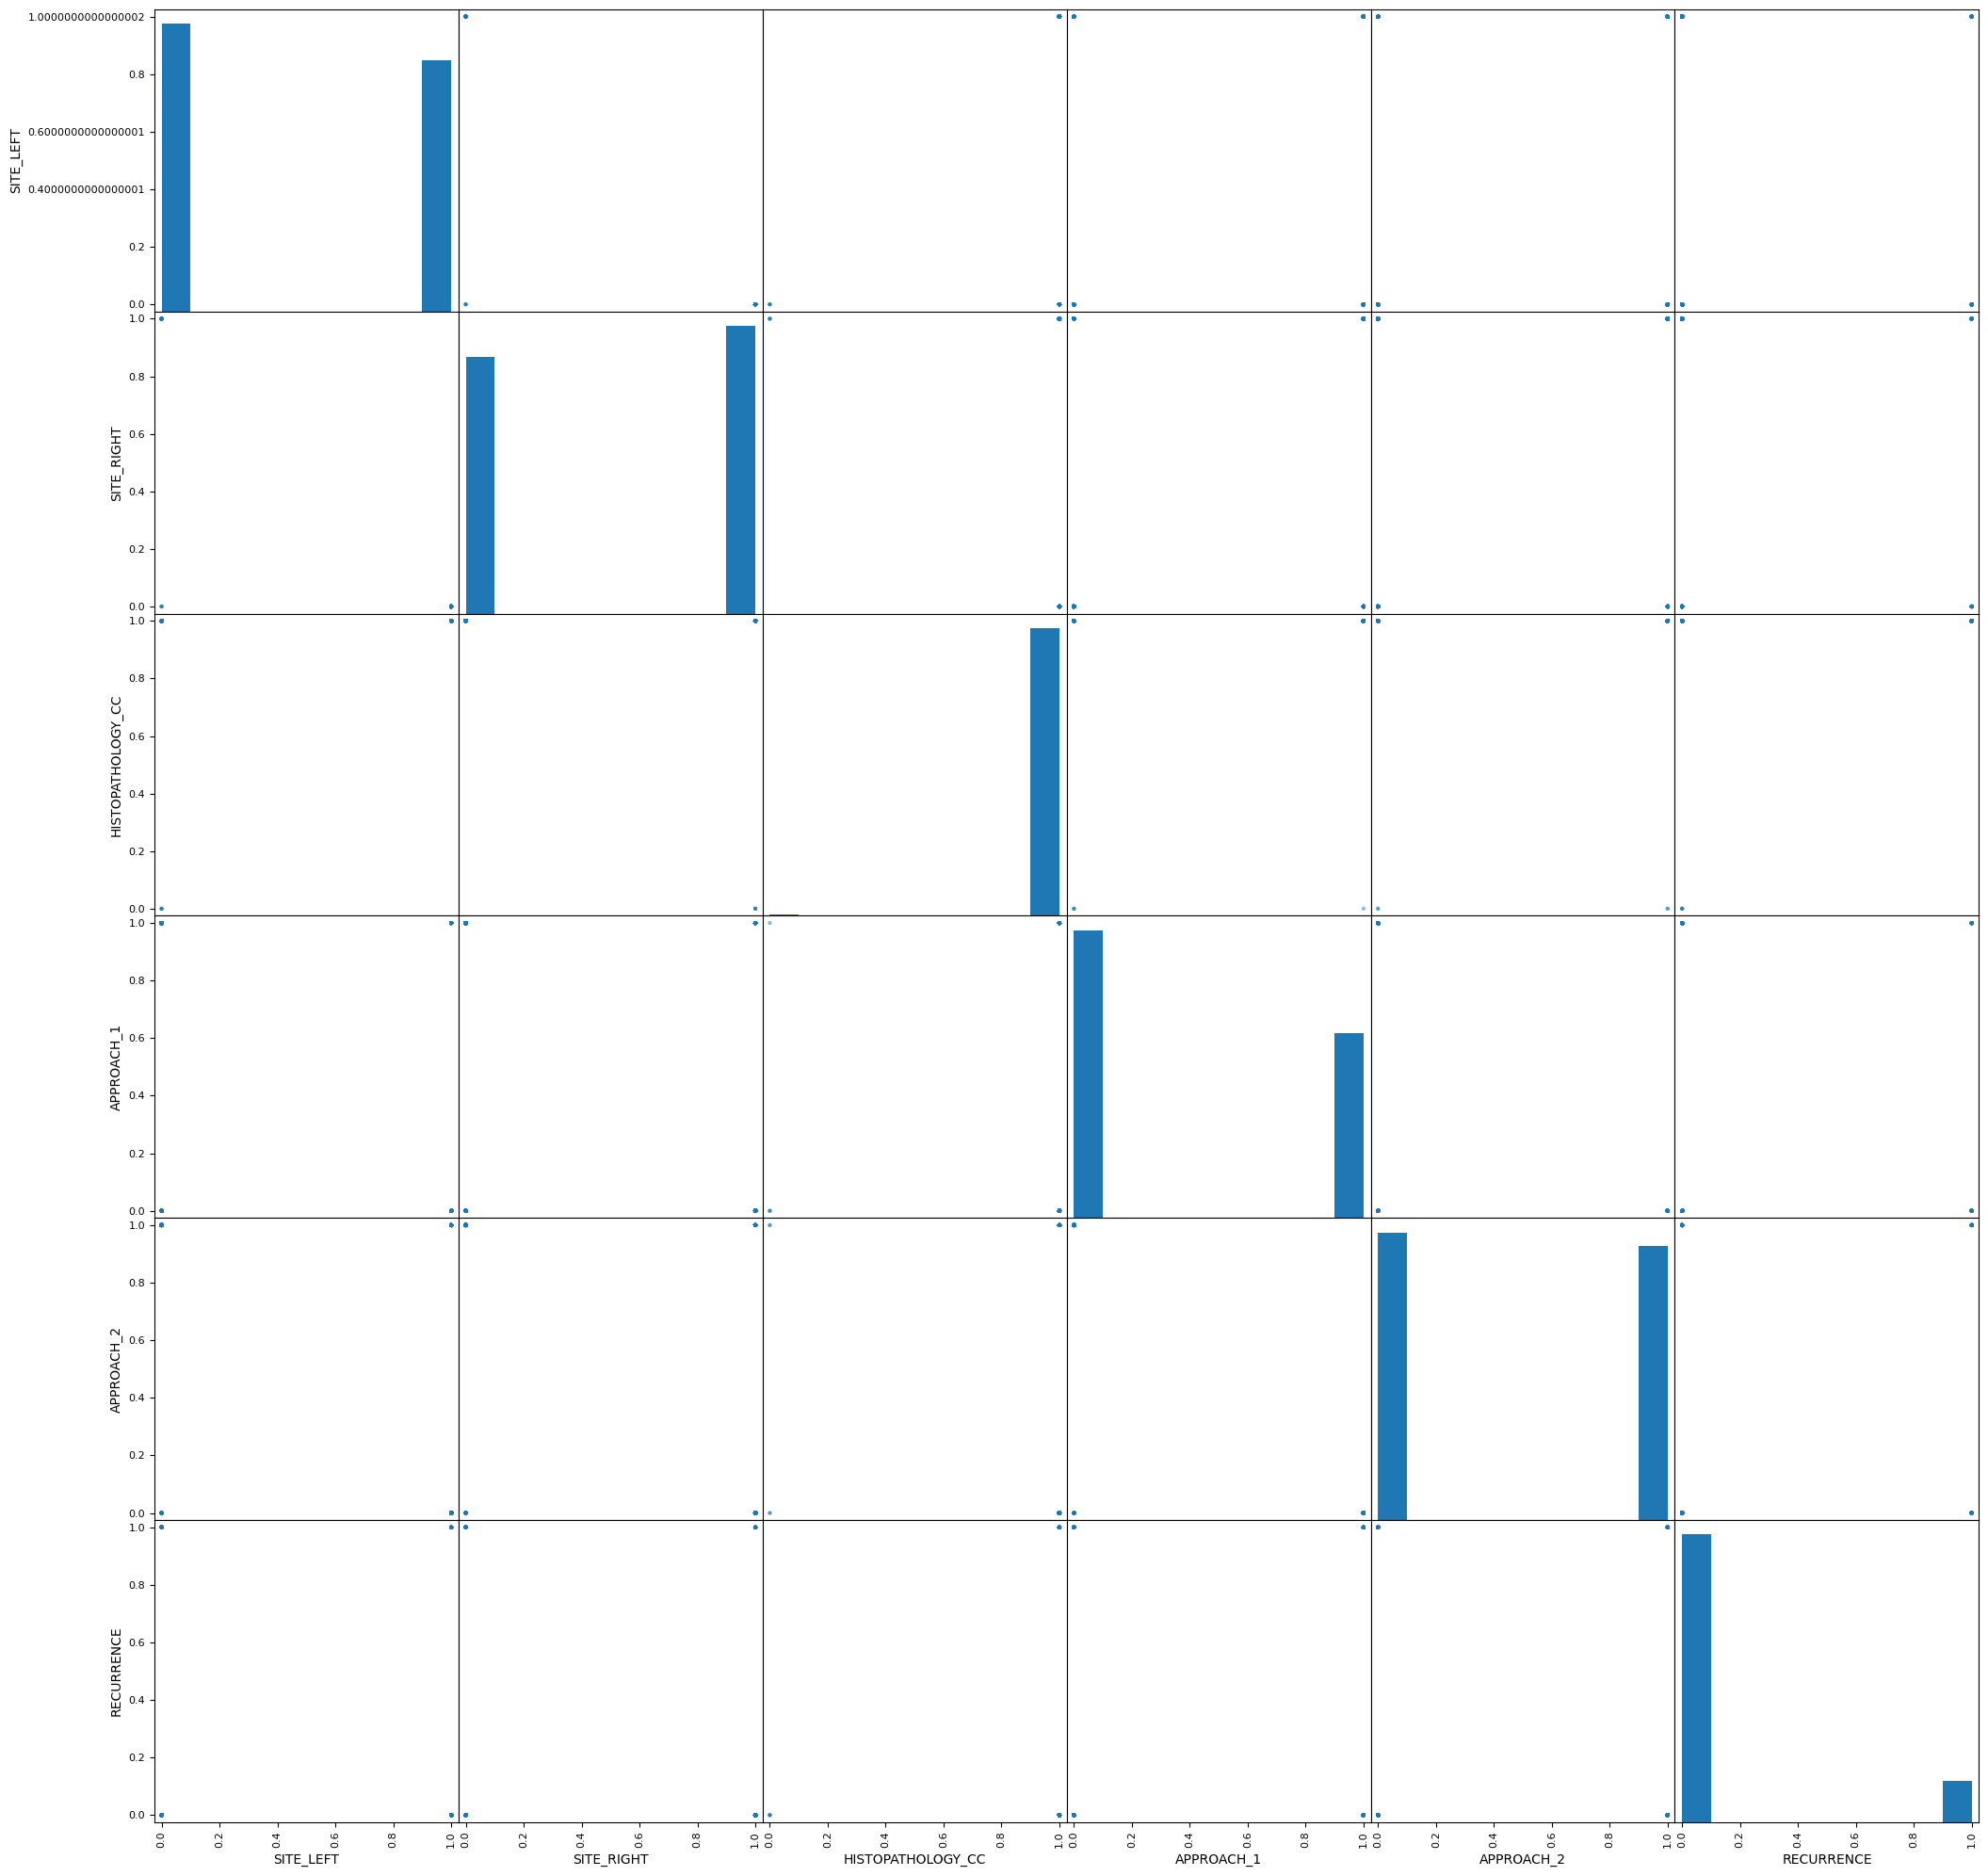

In [30]:
not_num_cols_1 = ['DM', 'HTN', 'CKD', 'INCIDENTAL', 'PAIN', 'HEMATURIA', 'MASS', 'LOW', 'FEVER', 'T', 'N', 'M', 'IVC INV', 'GRADE', 'SEX_M',
                'SITE_LEFT', 'SITE_RIGHT', 'HISTOPATHOLOGY_CC', 'APPROACH_1', 'APPROACH_2', 'APPROACH_3', 'RECURRENCE']
not_num_cols_2 = ['SITE_LEFT', 'SITE_RIGHT', 'HISTOPATHOLOGY_CC', 'APPROACH_1', 'APPROACH_2', 'RECURRENCE']
r = scatter_matrix(X[not_num_cols_2], figsize = (25, 25))

In [31]:
def chi_sq_test(cross_tabs):
    """
    Prints the Chi-Squared Statistic, p-value, and degress of freedom from a Chi-Squared test.
    
    Args:
        cross_tabs: A crosstab dataframe.
    """
    chi2, p, dof, con_table = chi2_contingency(cross_tabs)
    # print(f'chi-squared = {chi2}\np value= {p}\ndegrees of freedom = {dof}')
    return chi2, p

In [76]:
chi2matrix=pd.DataFrame(dummy_X, columns=not_num_cols_1,index=not_num_cols_1)
chi2matrix

,DM,HTN,CKD,INCIDENTAL,PAIN,HEMATURIA,MASS,LOW,FEVER,T,...,IVC INV,GRADE,SEX_M,SITE_LEFT,SITE_RIGHT,HISTOPATHOLOGY_CC,APPROACH_1,APPROACH_2,APPROACH_3,RECURRENCE
DM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HTN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CKD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INCIDENTAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HEMATURIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MASS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LOW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FEVER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
chi2_list = []
# significance level = 0.05
count = 0
for i in range(len(not_num_cols_1)):
    for j in range(len(not_num_cols_1)):
        count = count + 1
        c1 = not_num_cols_1[i]
        c2 = not_num_cols_1[j]
        # print(f'{c1}, {c2}')
        tabs = pd.crosstab(dummy_X[c1], dummy_X[c2])
        table = sm.stats.Table(tabs)
        chi2, p = chi_sq_test(tabs)
        # print(chi2matrix.loc[i, j])
        # chi2matrix.iloc[j, i] = chi2
        if p <= 0.05:
            chi2matrix.iloc[i, j] = np.log(chi2)
            if i == j:
                chi2matrix.iloc[i, j] = -1
            chi2_list.append((c1, c2, chi2, p))
        else:
            chi2matrix.iloc[i, j] = 0
        # print()
    chi2_df = pd.DataFrame(chi2_list, columns = ['C1', 'C2', 'CHI2', 'P'])
print(count)
chi2matrix

484


,DM,HTN,CKD,INCIDENTAL,PAIN,HEMATURIA,MASS,LOW,FEVER,T,...,IVC INV,GRADE,SEX_M,SITE_LEFT,SITE_RIGHT,HISTOPATHOLOGY_CC,APPROACH_1,APPROACH_2,APPROACH_3,RECURRENCE
DM,-1.000000,3.781707,0.000000,2.019658,1.351070,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
HTN,3.781707,-1.000000,0.000000,2.912846,0.000000,1.832449,0.000000,1.457014,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.188939,0.000000
CKD,0.000000,0.000000,-1.000000,0.000000,0.000000,1.868173,0.000000,0.000000,0.000000,2.964984,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.554628,2.087112,0.000000,0.000000
INCIDENTAL,2.019658,2.912846,0.000000,-1.000000,5.324689,4.631970,1.796057,2.649421,2.659529,4.305051,...,1.581101,3.466782,0.000000,0.000000,0.000000,0.00000,3.090370,0.000000,3.480990,0.000000
PAIN,1.351070,0.000000,0.000000,5.324689,-1.000000,3.940731,0.000000,0.000000,1.740552,0.000000,...,0.000000,0.000000,2.450356,0.000000,0.000000,1.42649,0.000000,1.925895,0.000000,0.000000
HEMATURIA,0.000000,1.832449,1.868173,4.631970,3.940731,-1.000000,0.000000,0.000000,0.000000,4.676237,...,2.420134,2.700840,0.000000,0.000000,0.000000,0.00000,3.679319,2.280153,3.001574,1.754077
MASS,0.000000,0.000000,0.000000,1.796057,0.000000,0.000000,-1.000000,0.000000,0.000000,2.750891,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
LOW,0.000000,1.457014,0.000000,2.649421,0.000000,0.000000,0.000000,-1.000000,2.375185,0.000000,...,0.000000,2.837337,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
FEVER,0.000000,0.000000,0.000000,2.659529,1.740552,0.000000,0.000000,2.375185,-1.000000,3.494624,...,2.841723,0.000000,0.000000,0.000000,0.000000,0.00000,2.043541,1.451255,0.000000,0.000000
T,0.000000,0.000000,2.964984,4.305051,0.000000,4.676237,2.750891,0.000000,3.494624,-1.000000,...,6.393904,4.709074,0.000000,3.099204,3.139900,0.00000,5.047501,4.326358,4.150336,3.387540


In [100]:
dummy_X.columns

Index(['AGE', 'DM', 'HTN', 'CKD', 'INCIDENTAL', 'PAIN', 'HEMATURIA', 'MASS',
       'LOW', 'FEVER', 'T', 'N', 'M', 'IVC INV', 'MAX DIA', 'GRADE', 'MONTHS',
       'SEX_M', 'SITE_LEFT', 'SITE_RIGHT', 'HISTOPATHOLOGY_CC', 'APPROACH_1',
       'APPROACH_2', 'APPROACH_3', 'RECURRENCE'],
      dtype='object')

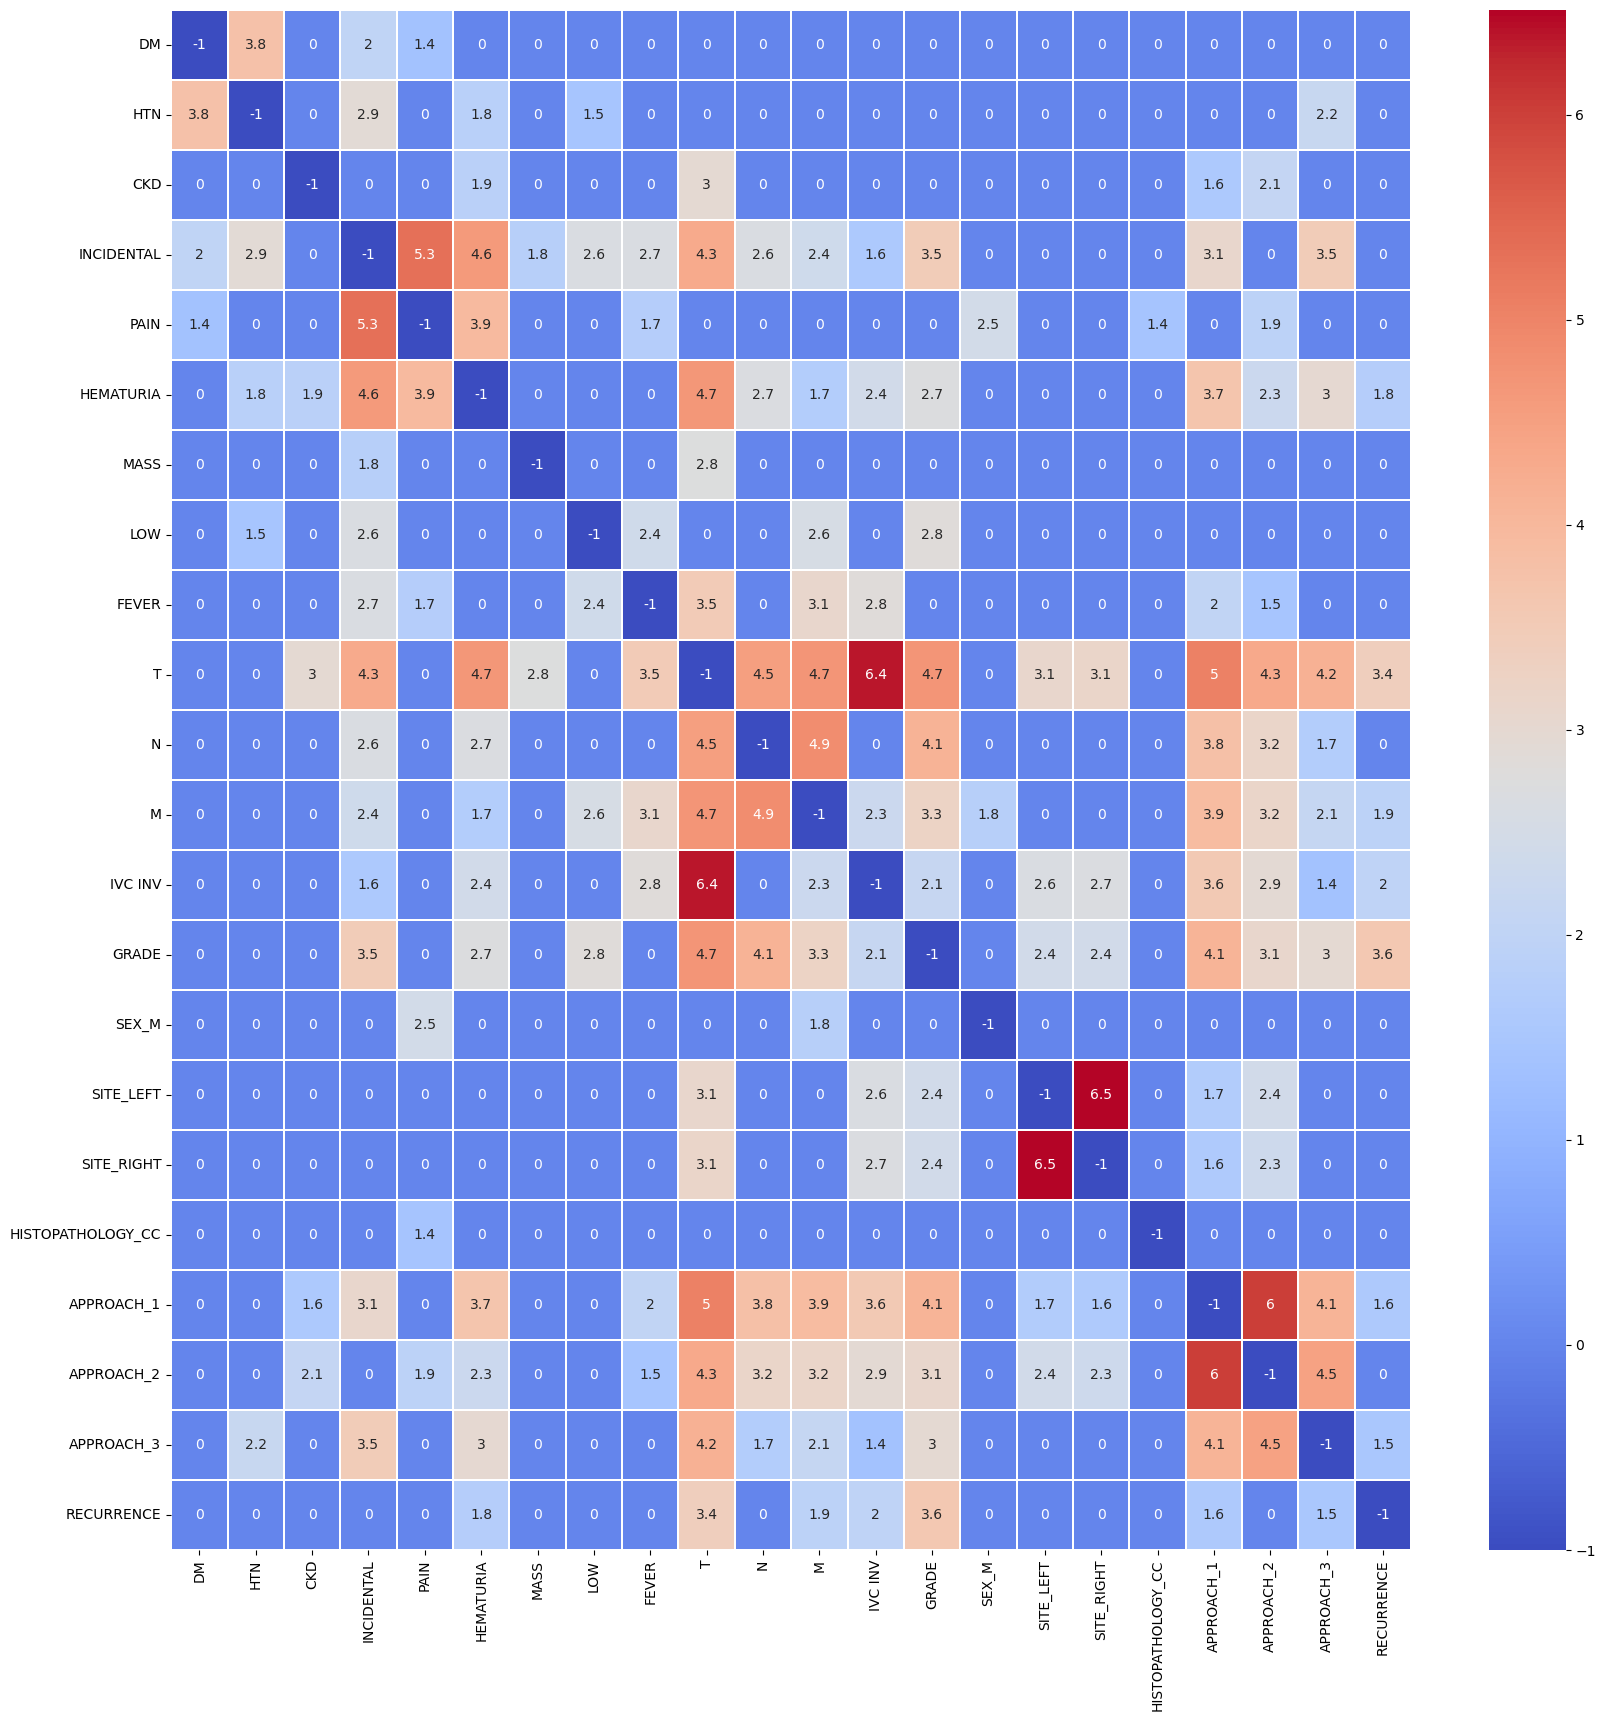

In [99]:
plt.figure(figsize = (20, 20))
sns.heatmap(chi2matrix.astype(np.float64), annot=True,linewidths=0.1, cmap='coolwarm')
plt.show()

In [91]:
chi2_df[chi2_df['C2'] == 'RECURRENCE']

,C1,C2,CHI2,P
51,HEMATURIA,RECURRENCE,5.778114,1.622695e-02
85,T,RECURRENCE,29.593056,1.127443e-04
108,M,RECURRENCE,6.835508,8.936327e-03
121,IVC INV,RECURRENCE,7.146375,7.511565e-03
135,GRADE,RECURRENCE,35.864220,8.000069e-08
169,APPROACH_1,RECURRENCE,4.958976,2.595557e-02
195,APPROACH_3,RECURRENCE,4.509923,3.369875e-02
203,RECURRENCE,RECURRENCE,683.920852,9.381633e-151


In [42]:
chi2_df[chi2_df['C1'] == 'SITE_LEFT']

,C1,C2,CHI2,P
81,SITE_LEFT,SITE_RIGHT,673.159177,2.053905e-148
82,SITE_LEFT,APPROACH_1,5.341192,2.082722e-02
83,SITE_LEFT,APPROACH_2,11.193985,8.206293e-04


In [43]:
chi2_df[chi2_df['C1'] == 'SITE_RIGHT']

,C1,C2,CHI2,P
84,SITE_RIGHT,APPROACH_1,5.024260,0.024995
85,SITE_RIGHT,APPROACH_2,10.230855,0.001381


In [40]:
chi2_df[chi2_df['C2'] == 'SITE_LEFT']

,C1,C2,CHI2,P
50,T,SITE_LEFT,22.180284,0.002365
69,IVC INV,SITE_LEFT,14.138537,0.000170
75,GRADE,SITE_LEFT,11.092527,0.011236


In [41]:
chi2_df[chi2_df['C2'] == 'SITE_RIGHT']

,C1,C2,CHI2,P
51,T,SITE_RIGHT,23.101566,1.636547e-03
70,IVC INV,SITE_RIGHT,14.650683,1.293877e-04
76,GRADE,SITE_RIGHT,11.069347,1.135674e-02
81,SITE_LEFT,SITE_RIGHT,673.159177,2.053905e-148


In [44]:
chi2_df[chi2_df['C1'] == 'APPROACH_1']

,C1,C2,CHI2,P
86,APPROACH_1,APPROACH_2,420.519814,1.880627e-93
87,APPROACH_1,APPROACH_3,59.529094,1.204995e-14
88,APPROACH_1,RECURRENCE,4.958976,2.595557e-02


In [45]:
chi2_df[chi2_df['C1'] == 'APPROACH_2']

,C1,C2,CHI2,P
89,APPROACH_2,APPROACH_3,88.801025,4.365898e-21


In [46]:
chi2_df[chi2_df['C2'] == 'APPROACH_1']

,C1,C2,CHI2,P
9,CKD,APPROACH_1,4.733326,2.958363e-02
21,INCIDENTAL,APPROACH_1,21.985217,2.747586e-06
33,HEMATURIA,APPROACH_1,39.619396,3.086030e-10
44,FEVER,APPROACH_1,7.717888,5.467633e-03
52,T,APPROACH_1,155.633069,2.659544e-30
58,N,APPROACH_1,45.247961,1.736012e-11
64,M,APPROACH_1,49.447383,2.037641e-12
71,IVC INV,APPROACH_1,35.720805,2.277191e-09
77,GRADE,APPROACH_1,59.614318,7.106254e-13
82,SITE_LEFT,APPROACH_1,5.341192,2.082722e-02


In [47]:
chi2_df[chi2_df['C2'] == 'APPROACH_2']

,C1,C2,CHI2,P
10,CKD,APPROACH_2,8.061598,4.521329e-03
27,PAIN,APPROACH_2,6.861286,8.808315e-03
34,HEMATURIA,APPROACH_2,9.778181,1.765949e-03
45,FEVER,APPROACH_2,4.268467,3.882595e-02
53,T,APPROACH_2,75.668236,1.049187e-13
59,N,APPROACH_2,23.666800,1.145416e-06
65,M,APPROACH_2,23.520828,1.235688e-06
72,IVC INV,APPROACH_2,19.031811,1.285573e-05
78,GRADE,APPROACH_2,21.912773,6.801471e-05
83,SITE_LEFT,APPROACH_2,11.193985,8.206293e-04


In [50]:
chi2_df[chi2_df['C2'] == 'APPROACH_3']

,C1,C2,CHI2,P
6,HTN,APPROACH_3,8.925736,2.811801e-03
22,INCIDENTAL,APPROACH_3,32.491865,1.196925e-08
35,HEMATURIA,APPROACH_3,20.117181,7.283941e-06
54,T,APPROACH_3,63.455342,3.071329e-11
60,N,APPROACH_3,5.631742,1.763809e-02
66,M,APPROACH_3,8.416372,3.718572e-03
73,IVC INV,APPROACH_3,3.956537,4.668966e-02
79,GRADE,APPROACH_3,19.369913,2.292335e-04
87,APPROACH_1,APPROACH_3,59.529094,1.204995e-14
89,APPROACH_2,APPROACH_3,88.801025,4.365898e-21


In [48]:
dummy_X.columns

Index(['AGE', 'DM', 'HTN', 'CKD', 'INCIDENTAL', 'PAIN', 'HEMATURIA', 'MASS',
       'LOW', 'FEVER', 'T', 'N', 'M', 'IVC INV', 'MAX DIA', 'GRADE', 'MONTHS',
       'SEX_M', 'SITE_LEFT', 'SITE_RIGHT', 'HISTOPATHOLOGY_CC', 'APPROACH_1',
       'APPROACH_2', 'APPROACH_3', 'RECURRENCE'],
      dtype='object')

In [52]:
column_names=dummy_X.columns
chisqmatrix=pd.DataFrame(dummy_X, columns=column_names,index=column_names)
chisqmatrix

,AGE,DM,HTN,CKD,INCIDENTAL,PAIN,HEMATURIA,MASS,LOW,FEVER,...,GRADE,MONTHS,SEX_M,SITE_LEFT,SITE_RIGHT,HISTOPATHOLOGY_CC,APPROACH_1,APPROACH_2,APPROACH_3,RECURRENCE
AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HTN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CKD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INCIDENTAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HEMATURIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MASS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LOW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FEVER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

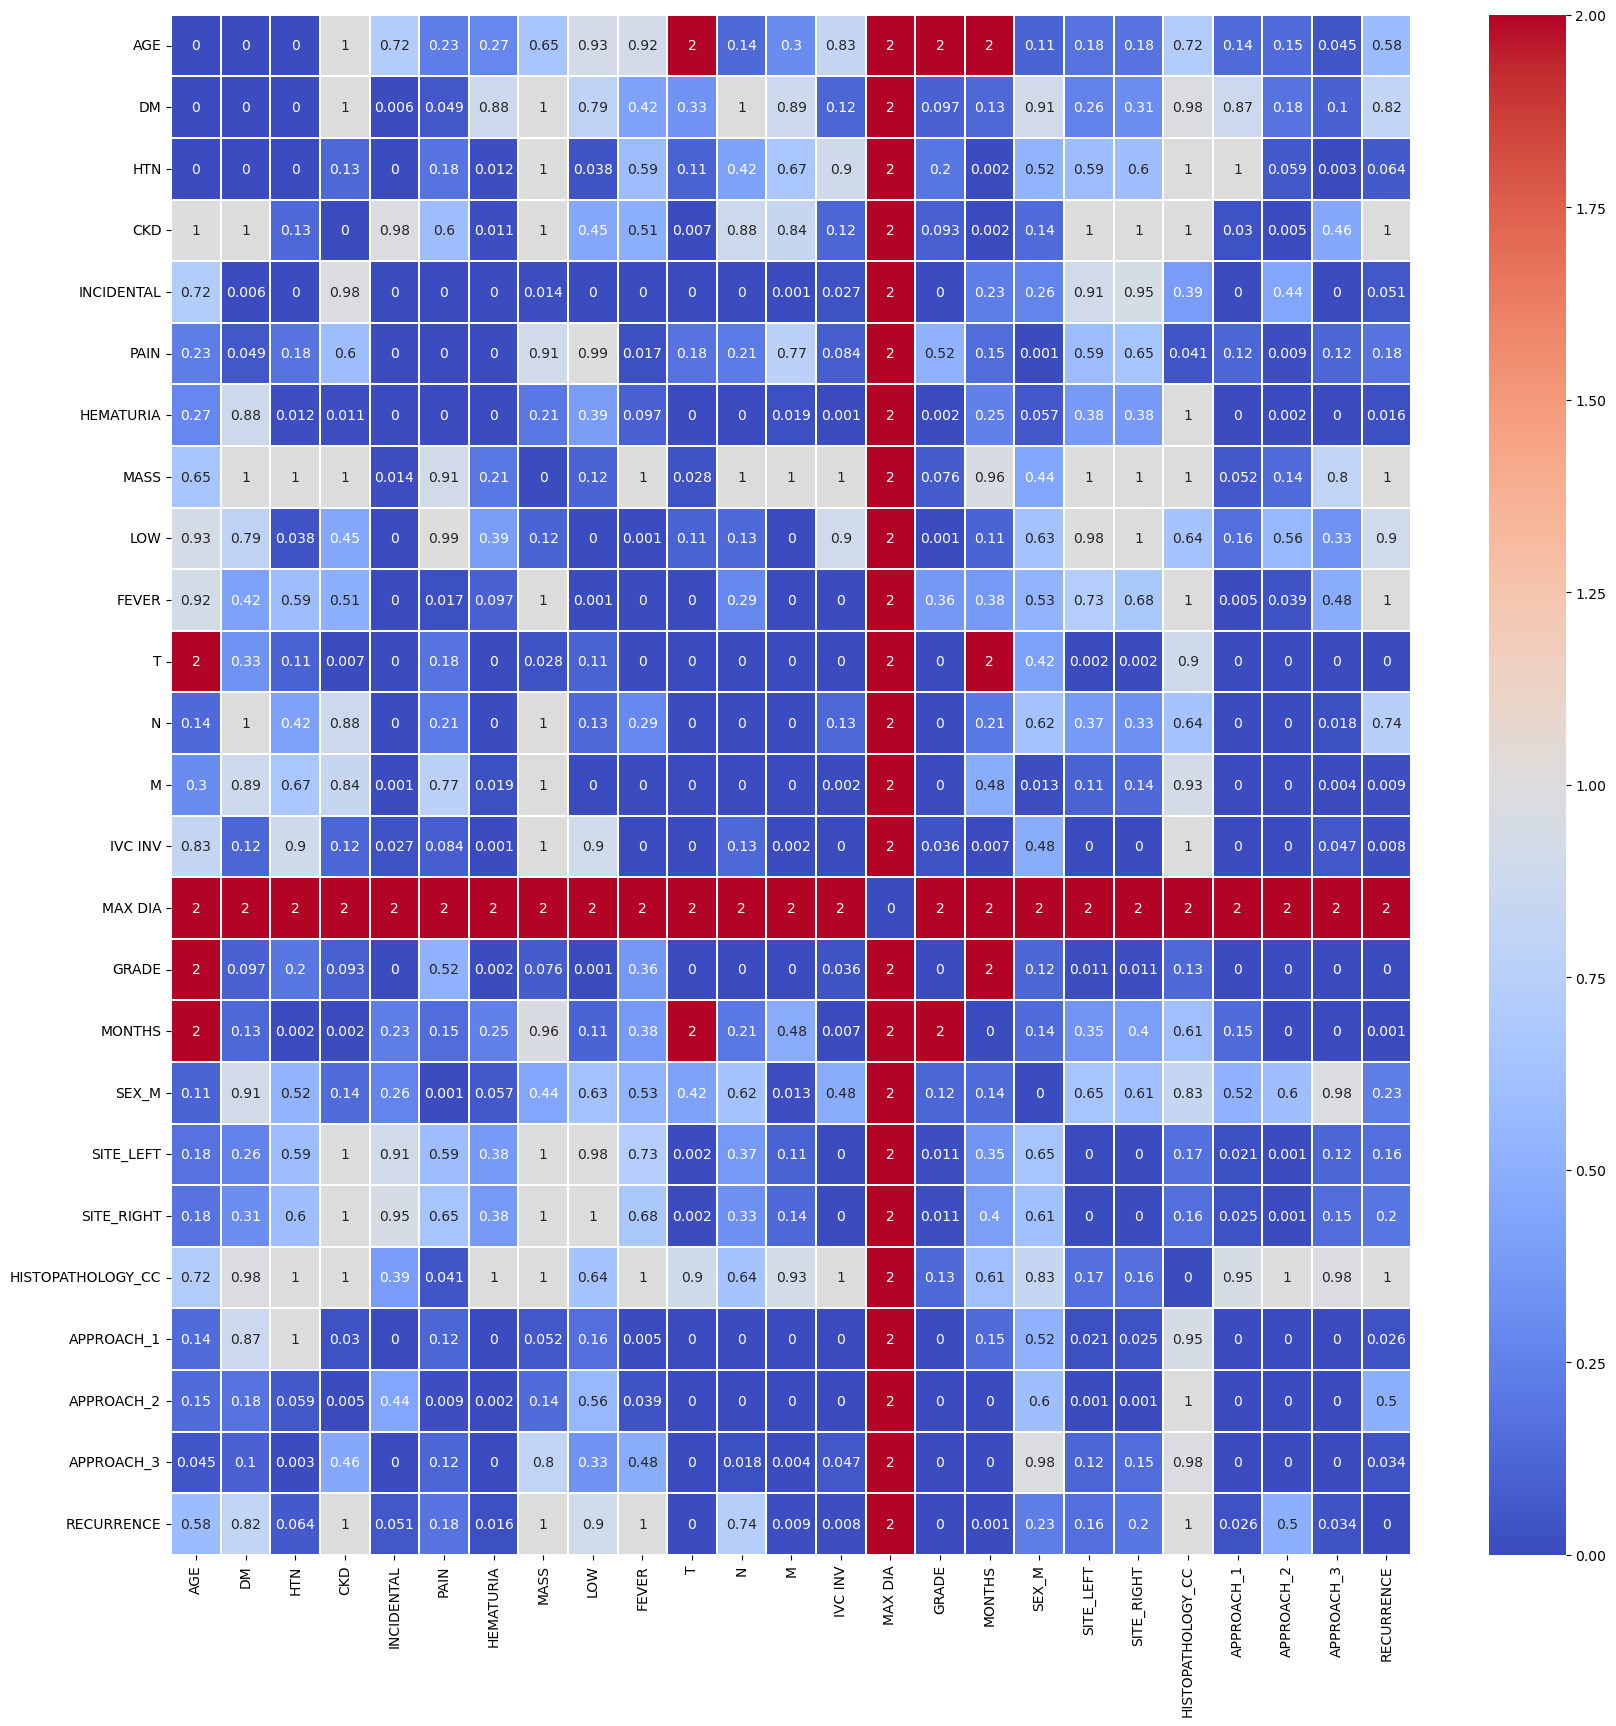

In [62]:
outercnt=0
innercnt=0
for icol in column_names:
    
    for jcol in column_names:
        
       mycrosstab=pd.crosstab(dummy_X[icol],dummy_X[jcol])
       #print (mycrosstab)
       stat,p,dof,expected=chi2_contingency(mycrosstab)
       chisqmatrix.iloc[outercnt,innercnt]=round(p,3)
       cntexpected=expected[expected<5].size
       perexpected=((expected.size-cntexpected)/expected.size)*100
      
       #print (icol)
       #print (jcol)
       if perexpected<20:
            chisqmatrix.iloc[outercnt,innercnt]=2
       #print (perexpected) 
       if icol==jcol:
           chisqmatrix.iloc[outercnt,innercnt]=0.00
       #print (expected) 
       innercnt=innercnt+1
    #print (outercnt) 
    outercnt=outercnt+1
    innercnt=0

plt.figure(figsize = (20, 20))
sns.heatmap(chisqmatrix.astype(np.float64), annot=True,linewidths=0.1, cmap='coolwarm')

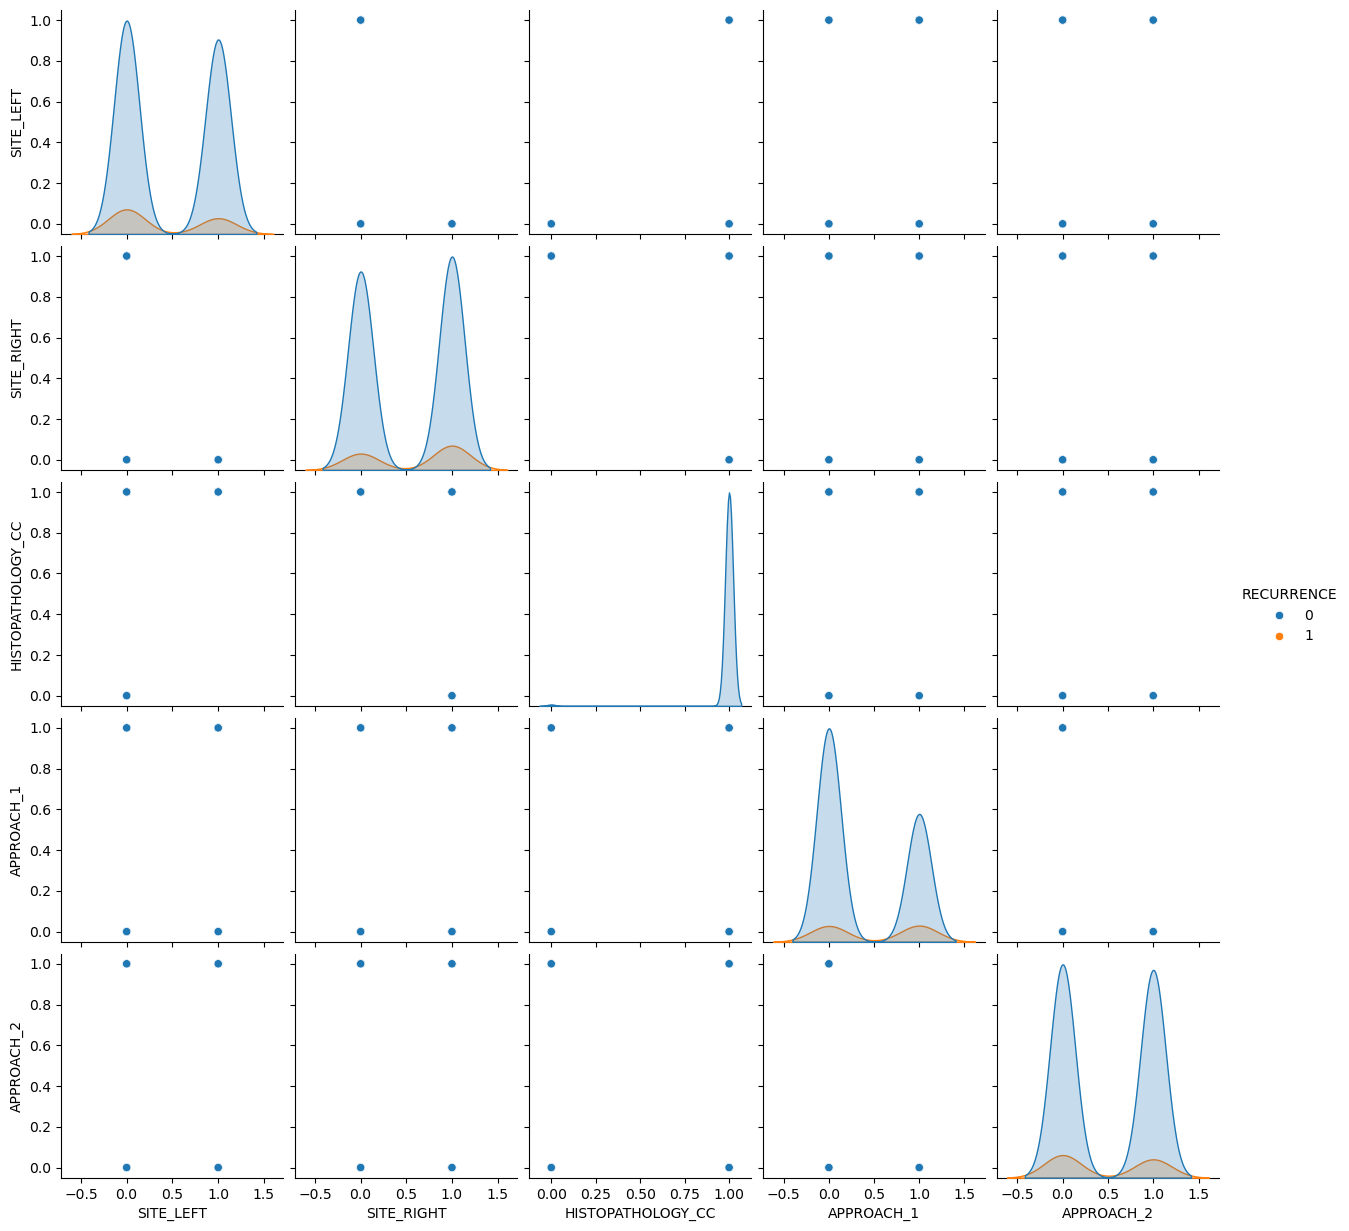

In [35]:
s = sns.pairplot(X[not_num_cols_2], hue = 'RECURRENCE')

In [114]:
# only sigmoid output
# 0.00001: 0.16 (200 epochs)
# 0.0001: 0.22 (200 epochs)
# 0.001: 0.04 (200 epochs), 0.22 (20 epochs), 0.25 (10 epochs), 0.30 (30 epochs), 0.20 (40 epochs)
# 0.01: 0.25 (10 epochs)
# 0.1: 0.18 (10 epochs), 0.11 (20 epochs) (tipping point, perhaps...? maybe start from 0.01, this one's all over the place)
# 1: 0.23 (10 epochs), 0.07 (20 epochs) (no good)
# 10: 0.34 (10 epochs), 0.27 (20 epochs), 0 (30 epochs) (no good)

In [118]:
len(X_train_pp), len(X_val_pp), len(X_test_pp)

(634, 121, 209)

In [13]:
1-sum(y_train_bal_1)/len(y_train_bal_1)

0.5

In [154]:
(1-sum(y_train_1)/len(y_train_1))/(sum(y_train_1)/len(y_train_1))

6.891304347826087

In [14]:
1-sum(y_val_1)/len(y_val_1)

0.8760330578512396

In [15]:
1-sum(y_t)/len(y_t)

0.8755980861244019

In [237]:
for col in X_train_1.columns:
    if X[col].nunique() == 2:
        print(f'{col}: {X[col].nunique()}')

DM: 2
HTN: 2
CKD: 2
INCIDENTAL: 2
PAIN: 2
HEMATURIA: 2
MASS: 2
LOW: 2
FEVER: 2
N: 2
M: 2
IVC INV: 2
SEX_M: 2
SITE_LEFT: 2
SITE_RIGHT: 2
HISTOPATHOLOGY_CC: 2
APPROACH_1: 2
APPROACH_2: 2


In [238]:
model_basic = Sequential([
    Dense(256, input_shape = [X_train_1.shape[1]], kernel_regularizer=l2(0.1)), #activation = 'relu',
    LeakyReLU(alpha = 0.1),
    BatchNormalization(),
    Dropout(0.2),
    Dense(256, kernel_regularizer=l2(0.1)), #activation = 'relu',
    LeakyReLU(alpha = 0.1),
    BatchNormalization(),
    Dropout(0.2),
    # Dense(6),
    Dense(1, activation = 'sigmoid') #, input_shape = [X_train_1.shape[1]], kernel_regularizer=l2(0.1))
])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
initial_lr = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_lr, decay_steps=15, decay_rate=0.9, staircase=True)
model_basic.compile(optimizer = Adam(learning_rate = lr_schedule), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [239]:
history_basic = model_basic.fit(X_train_pp, y_train_bal_1, epochs = 600, batch_size = 32, validation_data = [X_val_pp, y_val_1],
                                callbacks = [early_stopping]) #, class_weight = {0:1, 1:6.89})

Epoch 1/600
20/20 [==============================] - 5s 33ms/step - loss: 9.6243 - accuracy: 0.6782 - val_loss: 3.2972 - val_accuracy: 0.8430
Epoch 2/600
20/20 [==============================] - 0s 10ms/step - loss: 2.2871 - accuracy: 0.7035 - val_loss: 1.4955 - val_accuracy: 0.8760
Epoch 3/600
20/20 [==============================] - 0s 10ms/step - loss: 1.1917 - accuracy: 0.7760 - val_loss: 1.1345 - val_accuracy: 0.8760
Epoch 4/600
20/20 [==============================] - 0s 10ms/step - loss: 0.9486 - accuracy: 0.7950 - val_loss: 1.0719 - val_accuracy: 0.8760
Epoch 5/600
20/20 [==============================] - 0s 11ms/step - loss: 0.8729 - accuracy: 0.8139 - val_loss: 1.0006 - val_accuracy: 0.8760
Epoch 6/600
20/20 [==============================] - 0s 10ms/step - loss: 0.8474 - accuracy: 0.8044 - val_loss: 0.9857 - val_accuracy: 0.8760
Epoch 7/600
20/20 [==============================] - 0s 10ms/step - loss: 0.7988 - accuracy: 0.8233 - val_loss: 0.9242 - val_accuracy: 0.8760
Epoch 

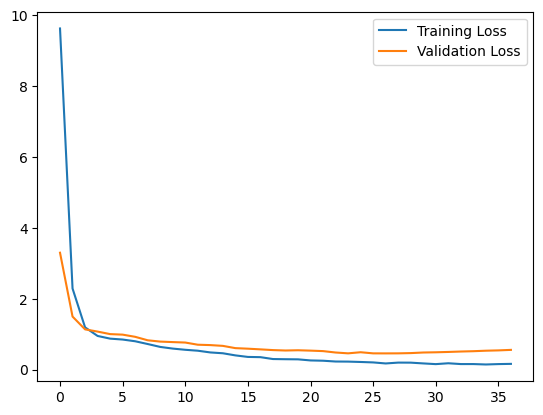

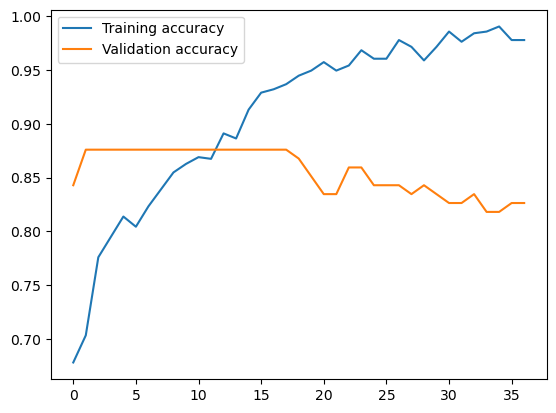

20/20 [==============================] - 0s 3ms/step
f1 score:  0.9968454258675079
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 

In [240]:
loss_basic = history_basic.history['loss']
val_loss_basic = history_basic.history['val_loss']
plt.plot(loss_basic, label = 'Training Loss')
plt.plot(val_loss_basic, label = 'Validation Loss')
plt.legend()
plt.show()

accuracy_basic = history_basic.history['accuracy']
val_accuracy_basic = history_basic.history['val_accuracy']
plt.plot(accuracy_basic, label = 'Training accuracy')
plt.plot(val_accuracy_basic, label = 'Validation accuracy')
plt.legend()
plt.show()

predictions_train = model_basic.predict(X_train_pp)
threshold = 0.5  # Adjust the threshold as needed
predicted_labels = (predictions_train > threshold).astype(int)
print("f1 score: ", f1_score(y_train_bal_1, predicted_labels))
print(predicted_labels.reshape((-1)))
cm = confusion_matrix(y_train_bal_1, predicted_labels)
class_names = ['Class 0', 'Class 1']
cm_table = tabulate(cm, headers=class_names, tablefmt='grid')
print("Confusion Matrix:")
print(cm_table)

predictions_val = model_basic.predict(X_val_pp)
threshold = 0.5  # Adjust the threshold as needed
predicted_labels = (predictions_val > threshold).astype(int)
print("f1 score: ", f1_score(y_val_1, predicted_labels))
print(predicted_labels.reshape((-1)))
cm = confusion_matrix(y_val_1, predicted_labels)
class_names = ['Class 0', 'Class 1']
cm_table = tabulate(cm, headers=class_names, tablefmt='grid')
print("Confusion Matrix:")
print(cm_table)

predictions = model_basic.predict(X_test_pp)
threshold = 0.5  # Adjust the threshold as needed
predicted_labels = (predictions > threshold).astype(int)
print("f1 score: ", f1_score(y_t, predicted_labels))
print(predicted_labels.reshape((-1)))
cm = confusion_matrix(y_t, predicted_labels)
class_names = ['Class 0', 'Class 1']
cm_table = tabulate(cm, headers=class_names, tablefmt='grid')
print("Confusion Matrix:")
print(cm_table)

In [150]:
# 1) first try adjusting the learning rate and architecture for this normal dataset
# 2) then skew this dataset and see the effects
# 3) maybe use make_classification for skewed with different parameters
# 4) then go back to original dataset

# [1]: reject 1, 0.1, 0.01
# [6, 1]: reject 1, 0.1, 0.01
# [20 20 6 1]: 

In [133]:
model = Sequential([
    # Dense(20, activation = 'sigmoid', input_shape = [11]),
    # LeakyReLU(alpha = 0.1),
    Dense(20, input_shape = [11]),
    LeakyReLU(alpha = 0.1),
    Dense(6),
    LeakyReLU(alpha = 0.1),
    Dense(1, activation = 'sigmoid') #, input_shape = [11])
])
initial_lr = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_lr, decay_steps=1000, decay_rate=0.9, staircase=True)
model.compile(optimizer = Adam(learning_rate = lr_schedule), loss = 'binary_crossentropy')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [134]:
history = model.fit(X_train, y_train, epochs = 400, validation_data = [X_val, y_val]) #, callbacks = [early_stopping])

Epoch 1/400
19/19 [==============================] - 1s 14ms/step - loss: 0.7880 - val_loss: 0.7420
Epoch 2/400
19/19 [==============================] - 0s 5ms/step - loss: 0.7402 - val_loss: 0.7132
Epoch 3/400
19/19 [==============================] - 0s 5ms/step - loss: 0.7114 - val_loss: 0.7042
Epoch 4/400
19/19 [==============================] - 0s 5ms/step - loss: 0.6969 - val_loss: 0.7003
Epoch 5/400
19/19 [==============================] - 0s 5ms/step - loss: 0.6888 - val_loss: 0.7011
Epoch 6/400
19/19 [==============================] - 0s 5ms/step - loss: 0.6839 - val_loss: 0.7029
Epoch 7/400
19/19 [==============================] - 0s 5ms/step - loss: 0.6803 - val_loss: 0.7057
Epoch 8/400
19/19 [==============================] - 0s 5ms/step - loss: 0.6771 - val_loss: 0.7087
Epoch 9/400
19/19 [==============================] - 0s 5ms/step - loss: 0.6743 - val_loss: 0.7120
Epoch 10/400
19/19 [==============================] - 0s 5ms/step - loss: 0.6717 - val_loss: 0.7134
Epoch 11

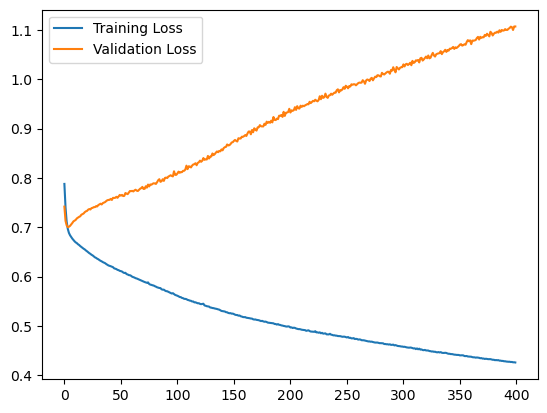

19/19 [==============================] - 0s 2ms/step
f1 score:  0.8014440433212997
[1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0
 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0
 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0
 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0
 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1
 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1
 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0
 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0
 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0
 0 1 0 1 0 0 1 0 

In [135]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, label = 'Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.legend()
plt.show()

pred_train = model.predict(X_train)
threshold = 0.5  # Adjust the threshold as needed
y_pred_train = (pred_train > threshold).astype(int)
print("f1 score: ", f1_score(y_train, y_pred_train))
print(y_pred_train.reshape((-1)))
cm = confusion_matrix(y_train, y_pred_train)
class_names = ['Class 0', 'Class 1']
cm_table = tabulate(cm, headers=class_names, tablefmt='grid')
print("Confusion Matrix:")
print(cm_table)

pred_test = model.predict(X_test)
threshold = 0.5  # Adjust the threshold as needed
y_pred_test = (pred_test > threshold).astype(int)
print("f1 score: ", f1_score(y_test, y_pred_test))
print(y_pred_test.reshape((-1)))
cm = confusion_matrix(y_test, y_pred_test)
class_names = ['Class 0', 'Class 1']
cm_table = tabulate(cm, headers=class_names, tablefmt='grid')
print("Confusion Matrix:")
print(cm_table)